In [162]:
import pandas as pd

# Load the CSV

df_ball = pd.read_csv('data3/name_age_sex_tennis-exp_vr-exp_ball-tracker.csv')

In [163]:
df_ball['hit'] = None

# Identify collisions ball and racket
hit_events = df_ball['event'].str.contains('RacketHit', na=False)

# Mark hits 
df_ball.loc[hit_events, 'hit'] = True
df_ball.loc[~hit_events, 'hit'] = False

# Mark TrialStart
df_ball['TrialStart'] = None
spawned_events = df_ball['event'].str.contains('TrialStart', na=False)
df_ball.loc[spawned_events, 'TrialStart'] = True
df_ball.loc[~spawned_events, 'TrialStart'] = False

# Identify court collisions
df_ball['Court_Enter'] = None
court_events = df_ball['event'].str.contains('CourtEnter', na=False)
df_ball.loc[court_events, 'Court_Enter'] = True
df_ball.loc[~court_events, 'Court_Enter'] = False

# Identify Net collisions
df_ball['Net_Enter'] = None
net_events = df_ball['event'].str.contains('NetEnter', na=False)
df_ball.loc[net_events, 'Net_Enter'] = True
df_ball.loc[~net_events, 'Net_Enter'] = False

# Delete the Event column
df_ball = df_ball.drop(columns=['event'])

In [164]:
# Convert Pos and Rot columns to numeric, coercing errors
df_ball[['time', 'position.x', 'position.y', 'position.z', 'rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']] = df_ball[['time', 'position.x', 'position.y', 'position.z', 'rotation.x', 'rotation.y', 'rotation.z', 'rotation.w']].apply(pd.to_numeric, errors='coerce')

In [165]:
# --- Dividir por stage ---
df_ball_stage0 = df_ball[df_ball["stage"] == 1]
df_ball_stage1 = df_ball[df_ball["stage"] == 3]
df_ball_stage2 = df_ball[df_ball["stage"] == 4]

STAGE 0

Total Court Collisions: 102
Total Racket Hits: 14
Total First Impacts after Racket Hits: 14


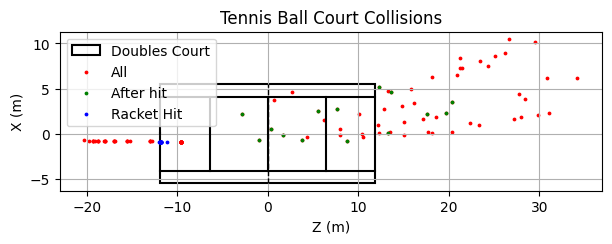

Phase 2 - STD X: 1.901, STD Z: 7.451, Combined Dispersion: 7.690


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

court_collision = df_ball_stage0[df_ball_stage0['Court_Enter'] == True]
racket_hits = df_ball_stage0[df_ball_stage0['hit'] == True]

print(f"Total Court Collisions: {len(court_collision)}")
print(f"Total Racket Hits: {len(racket_hits)}")


# Find the first court collision after each racket hit
first_impacts_court = []
    
for hit_time in racket_hits['time']:
    next_court_hit = court_collision[court_collision['time'] > hit_time].head(1)

    if not next_court_hit.empty:
        first_impacts_court.append(next_court_hit.iloc[0])

first_impacts_court = pd.DataFrame(first_impacts_court)

print(f"Total First Impacts after Racket Hits: {len(first_impacts_court)}")

court_length = 23.77
court_width_doubles = 10.97
court_width_singles = 8.23

service_line_distance = 6.40
half_length = court_length / 2
half_doubles = court_width_doubles / 2
half_singles = court_width_singles / 2
center_mark_half = 0.10 / 2

fig, ax = plt.subplots(figsize=(7, 12))

# Outer court (doubles)
court = patches.Rectangle(
    (-half_length, -half_doubles), court_length, court_width_doubles,
    linewidth=1.5, edgecolor='black', facecolor='none', label='Doubles Court')
ax.add_patch(court)

# Singles sidelines
ax.plot([-half_length, half_length], [-half_singles, -half_singles], color='black', linestyle='-')
ax.plot([-half_length, half_length], [half_singles, half_singles], color='black', linestyle='-')

# Service lines (both sides of the net)
ax.plot([-service_line_distance, -service_line_distance], [-half_singles, half_singles], color='black')
ax.plot([service_line_distance, service_line_distance], [-half_singles, half_singles], color='black')

# Center service line
ax.plot([0, 0], [-half_singles, half_singles], color='black')

# Net
ax.plot([0, 0], [-half_doubles, half_doubles], color='black', linestyle='--', linewidth=1)

# Center marks on baselines (10 cm long)
ax.plot([-half_length, -half_length], [-center_mark_half, center_mark_half], color='black')
ax.plot([half_length, half_length], [-center_mark_half, center_mark_half], color='black')


# Plot impact points
ax.scatter(court_collision['position.z'], court_collision['position.x'], color='red', label='All', zorder=1, s=3)

# Plot impact points after hit
ax.scatter(first_impacts_court['position.z'], first_impacts_court['position.x'], color='green', label='After hit', zorder=1, s=3)

# Plot position at hit
ax.scatter(racket_hits['position.z'], racket_hits['position.x'], color='blue', label='Racket Hit', zorder=1, s=3)


# Labels and layout
ax.set_xlabel('Z (m)')
ax.set_ylabel('X (m)')
#ax.set_xlim(-court_width/2 - 1, court_width/2 + 1)
#ax.set_ylim(-court_length/2 - 1, court_length/2 + 1)
ax.set_title(f'Tennis Ball Court Collisions')
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.savefig('Data/flipe_latest/tennis_ball_court_collisions.png', dpi=300, bbox_inches='tight')
plt.show()

import numpy as np

# Extract the X and Z coordinates of first court contacts
impact_coords = first_impacts_court[['position.x', 'position.z']].to_numpy()

# Compute standard deviations
std_x = np.std(impact_coords[:, 0])
std_z = np.std(impact_coords[:, 1])

# Combine into Euclidean dispersion measure
combined_dispersion = np.sqrt(std_x**2 + std_z**2)

print(f"Phase 2 - STD X: {std_x:.3f}, STD Z: {std_z:.3f}, Combined Dispersion: {combined_dispersion:.3f}")


Total Court Collisions: 0
Total Net Collisions: 0
Total Racket Hits: 0
Total First Impacts after Racket Hits: 0


KeyError: 'position.x'

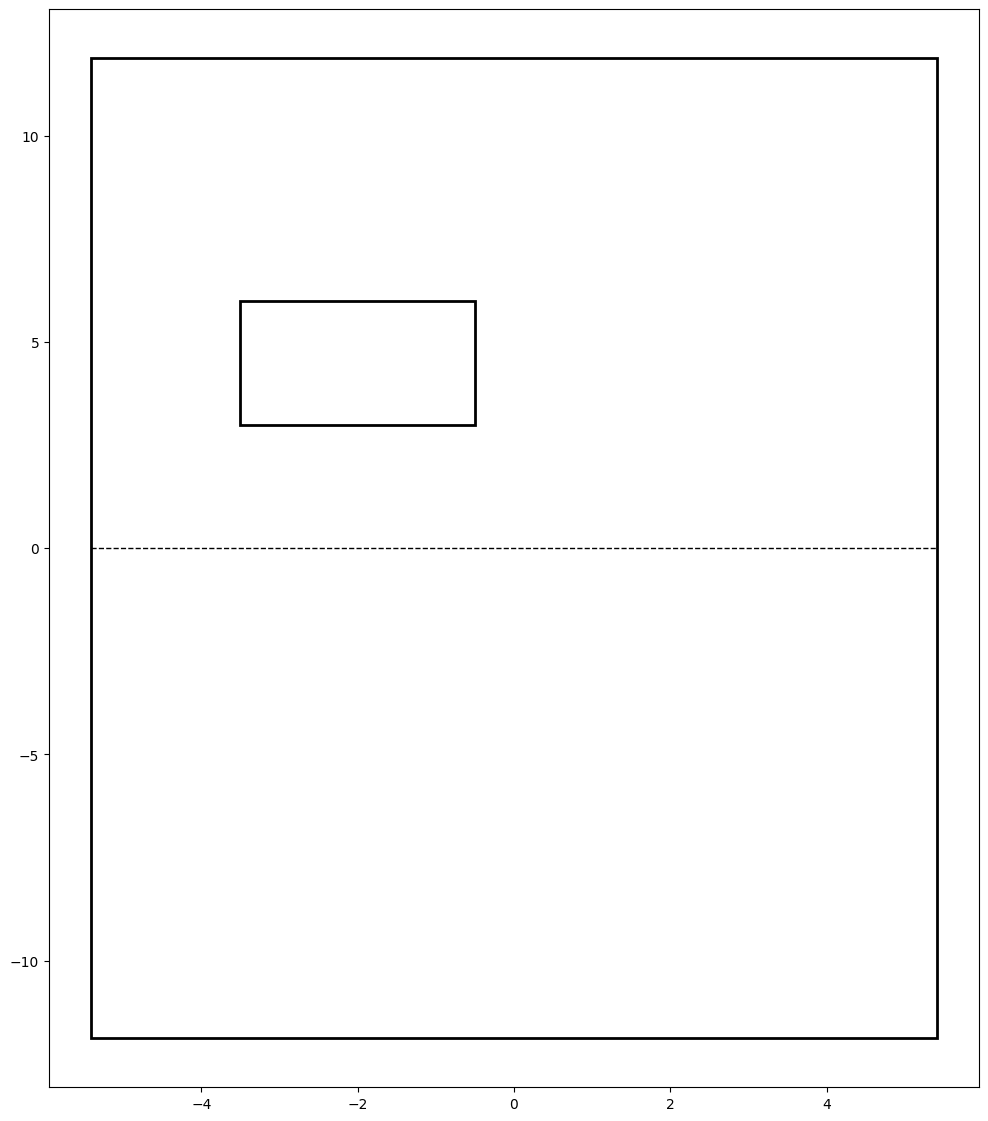

In [167]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

court_length = 23.77
court_width = 5.41*2

court_collision = df_ball_stage2[df_ball_stage2['Court_Enter'] == True]
net_collision = df_ball_stage2[df_ball_stage2['Net_Enter'] == True]
racket_hits = df_ball_stage2[df_ball_stage2['hit'] == True]

print(f"Total Court Collisions: {len(court_collision)}")
print(f"Total Net Collisions: {len(net_collision)}")
print(f"Total Racket Hits: {len(racket_hits)}")

# Find the first court collision after each racket hit
first_impacts_court = []
    
for hit_time in racket_hits['time']:
    next_court_hit = court_collision[court_collision['time'] > hit_time].head(1)

    if not next_court_hit.empty:
        first_impacts_court.append(next_court_hit.iloc[0])

first_impacts_court = pd.DataFrame(first_impacts_court)

print(f"Total First Impacts after Racket Hits: {len(first_impacts_court)}")

# Plot setup
fig, ax = plt.subplots(figsize=(12, 14))

court = patches.Rectangle(
    (-court_width/2, -court_length/2), court_width, court_length,
    linewidth=2, edgecolor='black', facecolor='none', label='Doubles Court')
ax.add_patch(court)

target = patches.Rectangle(
    (-3.5, 3), 3, 3,
    linewidth=2, edgecolor='black', facecolor='none', label='Target Area')
ax.add_patch(target)

# Draw net
ax.plot([-court_width/2, court_width/2], [0, 0], color='black', linestyle='--', linewidth=1, label='Net')

# Plot impact points
ax.scatter(court_collision['position.x'], court_collision['position.z'], color='red', label='Court', zorder=3, s=10)

# Plot impact points after hit
ax.scatter(first_impacts_court['position.x'], first_impacts_court['position.z'], color='green', label='Court after hit', zorder=3, s=10)

# Plot position at hit
ax.scatter(racket_hits['position.x'], racket_hits['position.z'], color='blue', label='Racket Hit', zorder=3, s=10)

# Plot net collisions
ax.scatter(net_collision['position.x'], net_collision['position.z'], color='orange', label='Net Collision', zorder=3, s=10)

# Labels and layout
ax.set_xlabel('X (m)')
ax.set_ylabel('Z (m)')
#ax.set_xlim(-court_width/2 - 1, court_width/2 + 1)
#ax.set_ylim(-court_length/2 - 1, court_length/2 + 1)
ax.set_title(f'Tennis Ball Court Collisions')
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.savefig('Data/flipe_latest/tennis_ball_court_collisions.png', dpi=300, bbox_inches='tight')
plt.show()

import numpy as np

# Extract the X and Z coordinates of first court contacts
impact_coords = first_impacts_court[['position.x', 'position.z']].to_numpy()

# Compute standard deviations
std_x = np.std(impact_coords[:, 0])
std_z = np.std(impact_coords[:, 1])

# Combine into Euclidean dispersion measure
combined_dispersion = np.sqrt(std_x**2 + std_z**2)

print(f"Phase 2 - STD X: {std_x:.3f}, STD Z: {std_z:.3f}, Combined Dispersion: {combined_dispersion:.3f}")

STAGE 1

Total Court Collisions: 0
Total Net Collisions: 0
Total Racket Hits: 0
Total First Impacts after Racket Hits: 0


KeyError: 'position.z'

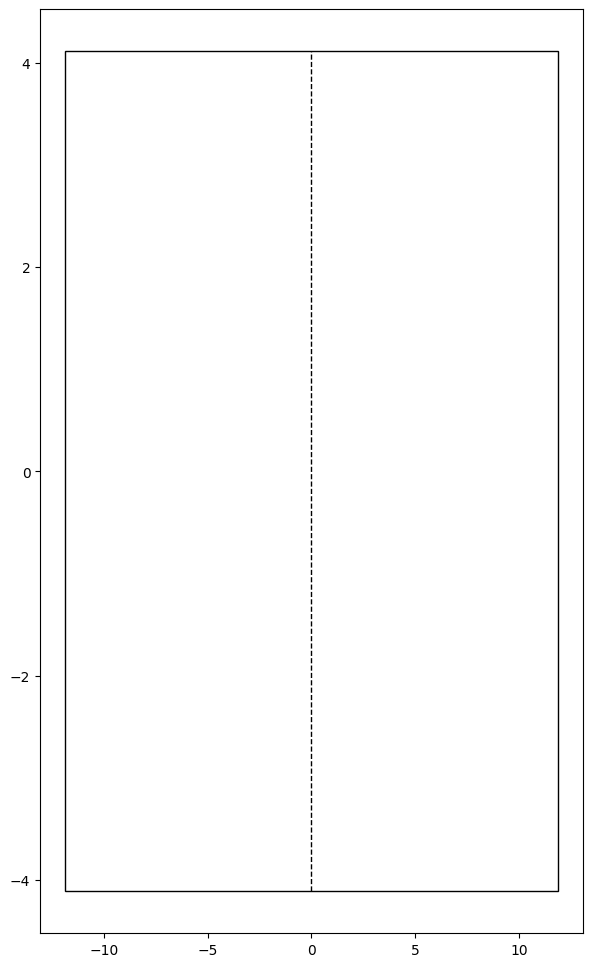

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

court_length = 23.77
court_width = 4.11*2

court_collision = df_ball_stage1[df_ball_stage1['Court_Enter'] == True]
net_collision = df_ball_stage1[df_ball_stage1['Net_Enter'] == True]
racket_hits = df_ball_stage1[df_ball_stage1['hit'] == True]

print(f"Total Court Collisions: {len(court_collision)}")
print(f"Total Net Collisions: {len(net_collision)}")
print(f"Total Racket Hits: {len(racket_hits)}")


# Find the first court collision after each racket hit
first_impacts_court = []
    
for hit_time in racket_hits['time']:
    next_court_hit = court_collision[court_collision['time'] > hit_time].head(1)

    if not next_court_hit.empty:
        first_impacts_court.append(next_court_hit.iloc[0])

first_impacts_court = pd.DataFrame(first_impacts_court)

print(f"Total First Impacts after Racket Hits: {len(first_impacts_court)}")

# Plot setup
fig, ax = plt.subplots(figsize=(7, 12))
court = patches.Rectangle(
    (-court_length/2, -court_width/2), court_length, court_width,
    linewidth=1, edgecolor='black', facecolor='none', label='Court')
ax.add_patch(court)

# Draw net
ax.plot([0, 0],[-court_width/2, court_width/2], color='black', linestyle='--', linewidth=1, label='Net')

# Plot impact points
ax.scatter(court_collision['position.z'], court_collision['position.x'], color='red', label='All', zorder=1, s=3)

# Plot impact points after hit
ax.scatter(first_impacts_court['position.z'], first_impacts_court['position.x'], color='green', label='After hit', zorder=1, s=3)

# Plot position at hit
ax.scatter(racket_hits['position.z'], racket_hits['position.x'], color='blue', label='Racket Hit', zorder=1, s=3)

# Plot net collisions
ax.scatter(net_collision['position.z'], net_collision['position.x'], color='orange', label='Net', zorder=1, s=3)


# Labels and layout
ax.set_xlabel('Z (m)')
ax.set_ylabel('X (m)')
ax.set_ylim(-5, 5)
ax.set_xlim(-15, 30)
ax.set_title(f'Tennis Ball Court Collisions')
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.savefig('Data/flipe_latest/tennis_ball_court_collisions.png', dpi=300, bbox_inches='tight')
plt.show()

import numpy as np

# Extract the X and Z coordinates of first court contacts
impact_coords = first_impacts_court[['position.x', 'position.z']].to_numpy()

# Compute standard deviations
std_x = np.std(impact_coords[:, 0])
std_z = np.std(impact_coords[:, 1])

# Combine into Euclidean dispersion measure
combined_dispersion = np.sqrt(std_x**2 + std_z**2)

print(f"Phase 2 - STD X: {std_x:.3f}, STD Z: {std_z:.3f}, Combined Dispersion: {combined_dispersion:.3f}")

STAGE 2

Total Court Collisions: 83
Total Net Collisions: 15
Total Racket Hits: 44
Total First Impacts after Racket Hits: 44


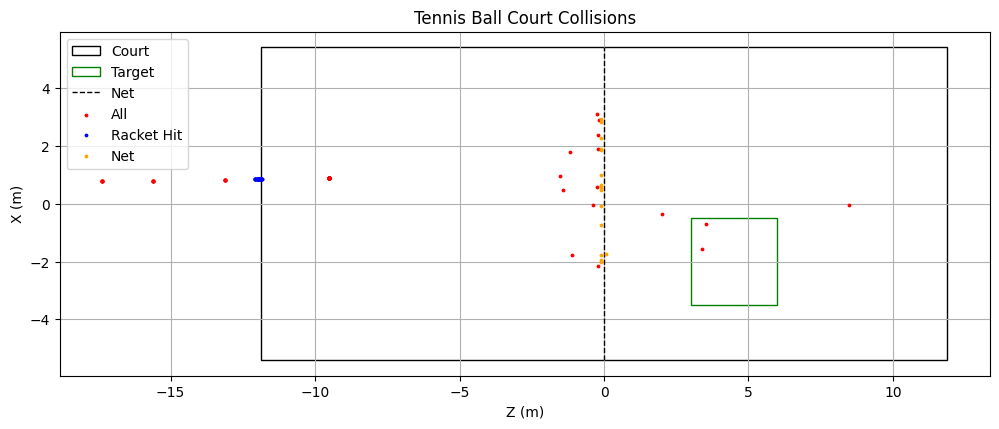

Phase 2 - STD X: 0.960, STD Z: 5.080, Combined Dispersion: 5.170


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

court_length = 23.77
court_width = 5.41*2

court_collision = df_ball_stage2[df_ball_stage2['Court_Enter'] == True]
net_collision = df_ball_stage2[df_ball_stage2['Net_Enter'] == True]
racket_hits = df_ball_stage2[df_ball_stage2['hit'] == True]

print(f"Total Court Collisions: {len(court_collision)}")
print(f"Total Net Collisions: {len(net_collision)}")
print(f"Total Racket Hits: {len(racket_hits)}")

# Find the first court collision after each racket hit
first_impacts_court = []
    
for hit_time in racket_hits['time']:
    next_court_hit = court_collision[court_collision['time'] > hit_time].head(1)

    if not next_court_hit.empty:
        first_impacts_court.append(next_court_hit.iloc[0])

first_impacts_court = pd.DataFrame(first_impacts_court)

print(f"Total First Impacts after Racket Hits: {len(first_impacts_court)}")

# Plot setup
fig, ax = plt.subplots(figsize=(12, 12))

court = patches.Rectangle(
    (-court_length/2, -court_width/2), court_length, court_width,
    linewidth=1, edgecolor='black', facecolor='none', label='Court')
ax.add_patch(court)

target = patches.Rectangle(
    (3, -3.5), 3, 3,
    linewidth=1, edgecolor='green', facecolor='none', label='Target')
ax.add_patch(target)

# Draw net
ax.plot([0, 0], [-court_width/2, court_width/2], color='black', linestyle='--', linewidth=1, label='Net')

# Plot impact points
ax.scatter(court_collision['position.z'], court_collision['position.x'], color='red', label='All', zorder=3, s=3)

# Plot impact points after hit
ax.scatter(first_impacts_court['position.z'], first_impacts_court['position.x'], color='green', label='After hit', zorder=3, s=3)

# Plot position at hit
ax.scatter(racket_hits['position.z'], racket_hits['position.x'], color='blue', label='Racket Hit', zorder=3, s=3)

# Plot net collisions
ax.scatter(net_collision['position.z'], net_collision['position.x'], color='orange', label='Net', zorder=3, s=3)

# Labels and layout
ax.set_xlabel('Z (m)')
ax.set_ylabel('X (m)')
#ax.set_xlim(-court_width/2 - 1, court_width/2 + 1)
#ax.set_ylim(-court_length/2 - 1, court_length/2 + 1)
ax.set_title(f'Tennis Ball Court Collisions')
ax.set_aspect('equal')
ax.grid(True)
ax.legend()
plt.savefig('Data/flipe_latest/tennis_ball_court_collisions.png', dpi=300, bbox_inches='tight')
plt.show()

import numpy as np

# Extract the X and Z coordinates of first court contacts
impact_coords = first_impacts_court[['position.x', 'position.z']].to_numpy()

# Compute standard deviations
std_x = np.std(impact_coords[:, 0])
std_z = np.std(impact_coords[:, 1])

# Combine into Euclidean dispersion measure
combined_dispersion = np.sqrt(std_x**2 + std_z**2)

print(f"Phase 2 - STD X: {std_x:.3f}, STD Z: {std_z:.3f}, Combined Dispersion: {combined_dispersion:.3f}")